# Preprocessing Data

# Convert to csv Format

In [ ]:
# Importing the required libraries
import xml.etree.ElementTree as Xet
import pandas as pd
import os
import numpy as np
  
cols = ["appName", "totalSourceBytes", "totalDestinationBytes", "totalDestinationPackets", "totalSourcePackets",
       "sourcePayloadAsBase64", "sourcePayloadAsUTF", "destinationPayloadAsBase64", "destinationPayloadAsUTF",
       "direction", "sourceTCPFlagsDescription", "destinationTCPFlagsDescription", "source", "protocolName",
       "sourcePort", "destination", "destinationPort", "startDateTime", "stopDateTime", "Tag"]
rows = []
  
# Parsing the XML file
import_directory = 'H:\\Datasets\\ISCX_2012\\xml\\'
files = os.listdir(import_directory)
df = ""
for file in files:
    print(file)
    xmlparse = Xet.parse(import_directory + file)
    print('Reading File ', file)
    root = xmlparse.getroot()     
    for i in root:        
        appName = i.find("appName").text
        totalSourceBytes = i.find("totalSourceBytes").text
        totalDestinationBytes = i.find("totalDestinationBytes").text
        totalDestinationPackets = i.find("totalDestinationPackets").text
        totalSourcePackets = i.find("totalSourcePackets").text
        sourcePayloadAsBase64 = i.find("sourcePayloadAsBase64").text
        #sourcePayloadAsUTF = i.find("sourcePayloadAsUTF").text
        destinationPayloadAsBase64 = i.find("destinationPayloadAsBase64").text
        destinationPayloadAsUTF = i.find("destinationPayloadAsUTF").text
        direction = i.find("direction").text
        sourceTCPFlagsDescription = i.find("sourceTCPFlagsDescription").text
        destinationTCPFlagsDescription = i.find("destinationTCPFlagsDescription").text
        source = i.find("source").text
        protocolName = i.find("protocolName").text
        sourcePort = i.find("sourcePort").text
        destination = i.find("destination").text
        destinationPort = i.find("destinationPort").text
        startDateTime = i.find("startDateTime").text
        stopDateTime = i.find("stopDateTime").text
        Tag = i.find("Tag").text        
        rows.append({"appName": appName,
                 "totalSourceBytes": totalSourceBytes,
                 "totalDestinationBytes": totalDestinationBytes,
                 "totalDestinationPackets": totalDestinationPackets,
                 "totalSourcePackets": totalSourcePackets,
                 "sourcePayloadAsBase64": sourcePayloadAsBase64,
                 #"sourcePayloadAsUTF": sourcePayloadAsUTF,
                 "destinationPayloadAsBase64": destinationPayloadAsBase64,
                 "destinationPayloadAsUTF": destinationPayloadAsUTF,
                 "direction": direction,
                 "sourceTCPFlagsDescription": sourceTCPFlagsDescription,
                 "destinationTCPFlagsDescription": destinationTCPFlagsDescription,
                 "source": source,
                 "protocolName": protocolName,
                 "sourcePort": sourcePort,
                 "destination": destination,
                 "destinationPort": destinationPort,
                 "startDateTime": startDateTime,
                 "stopDateTime": stopDateTime,
                 "Tag": Tag})
    df = pd.DataFrame(rows, columns=cols)   
    rows.clear()
    # Writing dataframe to csv
    df.to_csv('H:\\Datasets\\ISCX_2012\\csv\\' + file + '.csv')


In [1]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import glob

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu, "\n")
else:
  print("No GPU device found")

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') 



In [3]:
!nvidia-smi

Sat Jun  3 10:59:03 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.98                 Driver Version: 535.98       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   53C    P8              13W / 200W |    472MiB /  8192MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [4]:
path = r'H:\\Datasets\\ISCX_2012\\csv\\' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, low_memory=False)
    li.append(df)
    print("Read Completed for ", filename)

df = pd.concat(li, axis=0, ignore_index=True)
print("Finished Reading All Files.")

Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedMonJun14Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedSatJun12Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedSunJun13Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedThuJun17-1Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedThuJun17-2Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedThuJun17-3Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedTueJun15-1Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedTueJun15-2Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedTueJun15-3Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedWedJun16-1Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedWedJun16-2Flows.xml.csv
Read Completed for  H:\\Datasets\\ISCX_2012\\csv\TestbedWedJun16-3Flows.xml.csv
Finished Reading All Files.


In [5]:
df = df.rename(columns={'Tag': 'Label'})

In [6]:
df.Label.value_counts()

Normal    2002747
Attack      68910
Name: Label, dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0', 'appName', 'totalSourceBytes', 'totalDestinationBytes',
       'totalDestinationPackets', 'totalSourcePackets',
       'sourcePayloadAsBase64', 'sourcePayloadAsUTF',
       'destinationPayloadAsBase64', 'destinationPayloadAsUTF', 'direction',
       'sourceTCPFlagsDescription', 'destinationTCPFlagsDescription', 'source',
       'protocolName', 'sourcePort', 'destination', 'destinationPort',
       'startDateTime', 'stopDateTime', 'Label'],
      dtype='object')

In [8]:
# Remove columns with only values of 0
useless_columns = ['Unnamed: 0', 'startDateTime', 'stopDateTime', 'sourcePayloadAsBase64', 'direction',
                   'sourcePayloadAsUTF', 'destinationPayloadAsUTF', 'destinationPayloadAsUTF', 'sourceTCPFlagsDescription', 
                   'destinationTCPFlagsDescription', 'destinationPayloadAsBase64', 'appName', 'source', 'destination', 'protocolName'
                   ]
df.drop(labels=useless_columns, axis='columns', inplace=True)
print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

After dropping some columns: 
	 there are 7 columns and 2071657 rows


In [9]:
df.head()

,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePort,destinationPort,Label
0,16076,0,0,178,5353,5353,Normal
1,384,0,0,6,4435,80,Normal
2,171,642,4,2,4428,53,Normal
3,384,0,0,6,3639,80,Normal
4,186,128,2,2,3641,80,Normal


In [10]:
# Drop NaN values
print('There are {} columns and {} rows in the Layer 1 Data.'.format(len(df.columns), len(df)))
df.dropna(axis='index', inplace=True)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
print('After dropping NaN values, there are {} columns and {} rows in Layer 1 Data.\n\n'.format(len(df.columns), len(df)))

There are 7 columns and 2071657 rows in the Layer 1 Data.
After dropping NaN values, there are 7 columns and 2071657 rows in Layer 1 Data.




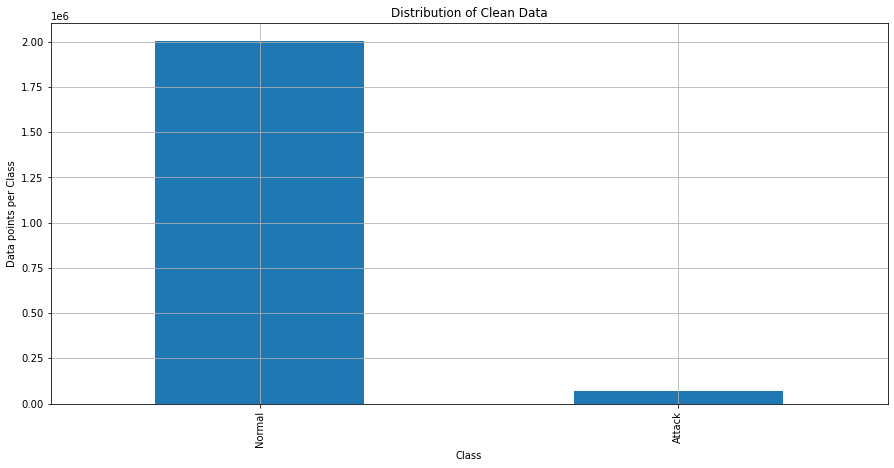

In [11]:
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Clean Data')
plt.grid()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

1    2002747
0      68910
Name: Label, dtype: int64

In [13]:
data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

del df

X = data_np[:, 0:6]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,7:]).toarray()

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

In [15]:
X.shape

(2071657, 6)

In [16]:
Y.shape

(2071657, 2)

In [17]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(1553742, 6)
(1553742, 2)
(517915, 6)
(517915, 2)


In [18]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Dropout
from sklearn import metrics
from keras.models import Sequential

# DNN

In [19]:
# Simple 3 Layer Dense Model

model = Sequential()

model.add(Dense(64, input_dim=_features, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=64,
                              epochs=30,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0

In [20]:
#import tensorflow.keras.backend as K
#print('Learning Rate - ')
#print(K.eval(model.optimizer.lr)) 
#print('==================================')
#model.summary()

#model.save('H:/Datasets/ISCX_2012/model.h5')

In [21]:
import time

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

16185/16185 [==============================] - 13s 812us/step
Inference time: 21.10 seconds


In [22]:
pred.shape
y_test.shape

(517915,)

In [23]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[ 16232,    886],
       [   371, 500426]], dtype=int64)

In [24]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

16185/16185 [==============================] - 13s 804us/step
Inference time: 17.41 seconds
Completed
Time taken: 0:00:41.334671
Validation score: 0.9975729608140332
Evaluation score: [0.006717247422784567, 0.9975729584693909]
Recall score: 0.9975729608140332
Precision score: 0.9975524986370965
F1 Measure score: 0.9975550511263263
ROC-AUC score: 0.9737503989385167


In [27]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [28]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

In [ ]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()


#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

# CNN Model

In [25]:
import keras
from keras import models, layers, regularizers, optimizers, losses, metrics

from sklearn.model_selection import StratifiedShuffleSplit
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [31]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, MaxPooling1D, Dropout
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf

K = keras.backend

X_train = X_train.reshape(X_train.shape[0], 6, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 6, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, padding="same", activation="relu", input_shape=(_features, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Convolution1D(filters=256, kernel_size=1, activation="relu"))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, kernel_initializer='normal'))
model.add(Dense(n_classes, activation='softmax'))

model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=64,
                              epochs=30,
                              verbose=True, #callbacks=[reduce_lr, early_stop_callback],
                              validation_data=(X_test, Y_test))  

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 6, 128)            896       
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 3, 128)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 3, 256)            33024     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 1, 256)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)              

In [32]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
#import tensorflow.keras.backend as K
#print('Learning Rate - ')
#print(K.eval(model.optimizer.lr)) 
#print('==================================')
#model.summary()

16185/16185 [==============================] - 16s 953us/step
Best loss: 0.005845583000034094
Balanced Acc loss: 95.3510565889483


In [33]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()

inference_time = end_time - start_time
print("Inference time: {:.2f} seconds".format(inference_time))

pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)
#roc_auc_socre = multiclass_roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

16185/16185 [==============================] - 15s 935us/step
Inference time: 19.50 seconds
Completed
Time taken: 0:00:46.069103
Validation score: 0.9978672426942645
Evaluation score: [0.01065889559686184, 0.9978672191619873]
Recall score: 0.9978672426942645
Precision score: 0.9978150896959275
F1 Measure score: 0.9977643548514277
ROC-AUC score: 0.9535105658894828


In [34]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [35]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

16185/16185 [==============================] - 15s 933us/step


In [36]:
pred.shape
y_test.shape

(517915,)

In [37]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[ 15195,   1923],
       [   321, 500476]], dtype=int64)

In [ ]:
cf_matrix = confusion_matrix(y_test, pred)
labels = ['Benign','Attack']
sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', xticklabels=labels, yticklabels=labels, cmap='Blues')

In [ ]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['Benign','Attack']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show() 

In [49]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

In [ ]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('CNN: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

In [ ]:
#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('CNN: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.title('CNN: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [54]:
print("Precision: ", precision_score(y_test, pred, average='weighted'))
print("Recall: ", recall_score(y_test, pred, average='weighted'))
print("F-Measure: ", f1_score(y_test, pred, average='weighted'))

Precision:  0.9975250877160867
Recall:  0.9975073129760675
F-Measure:  0.997514892905715
